# Diabetes Prediction Using Machine Learning

---

## Introduction

Diabetes is a chronic health condition that affects millions of people worldwide. Early diagnosis and intervention are critical to managing the disease and reducing complications. Machine learning offers promising tools to assist healthcare professionals in identifying individuals at risk by analyzing medical data.

This project uses the **Diabetes Dataset**, which contains various medical measurements for female patients, to build predictive models that classify whether a patient has diabetes.

---

## Objectives

- Perform Exploratory Data Analysis (EDA) to understand the data distribution and relationships between features.
- Preprocess the data, handling missing or zero values in key features.
- Build and evaluate classification models (e.g., Logistic Regression, Random Forest) to predict diabetes.
- Interpret model results and identify the most important predictors.


---

## Dataset Overview

The dataset consists of 8 input features and a binary target variable:

| Feature                  | Description                                     |
|--------------------------|------------------------------------------------|
| Pregnancies              | Number of times pregnant                        |
| Glucose                  | Plasma glucose concentration                    |
| BloodPressure            | Diastolic blood pressure (mm Hg)                |
| SkinThickness            | Triceps skinfold thickness (mm)                  |
| Insulin                  | 2-Hour serum insulin (mu U/ml)                   |
| BMI                      | Body Mass Index (weight in kg/(height in m)^2)  |
| DiabetesPedigreeFunction | Diabetes pedigree function (genetic influence)  |
| Age                      | Age in years                                     |
| Outcome                  | Class variable (0 = no diabetes, 1 = diabetes) |

---

Let’s get started with loading and exploring the data!


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

In [4]:
df.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data Cleaning Stage

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
cols = ['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df = df[(df[cols] != 0).all(axis=1)]

In [8]:
df.describe()
df.info()
df['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


Outcome
0    262
1    130
Name: count, dtype: int64

## Histograms for Feature Distribution

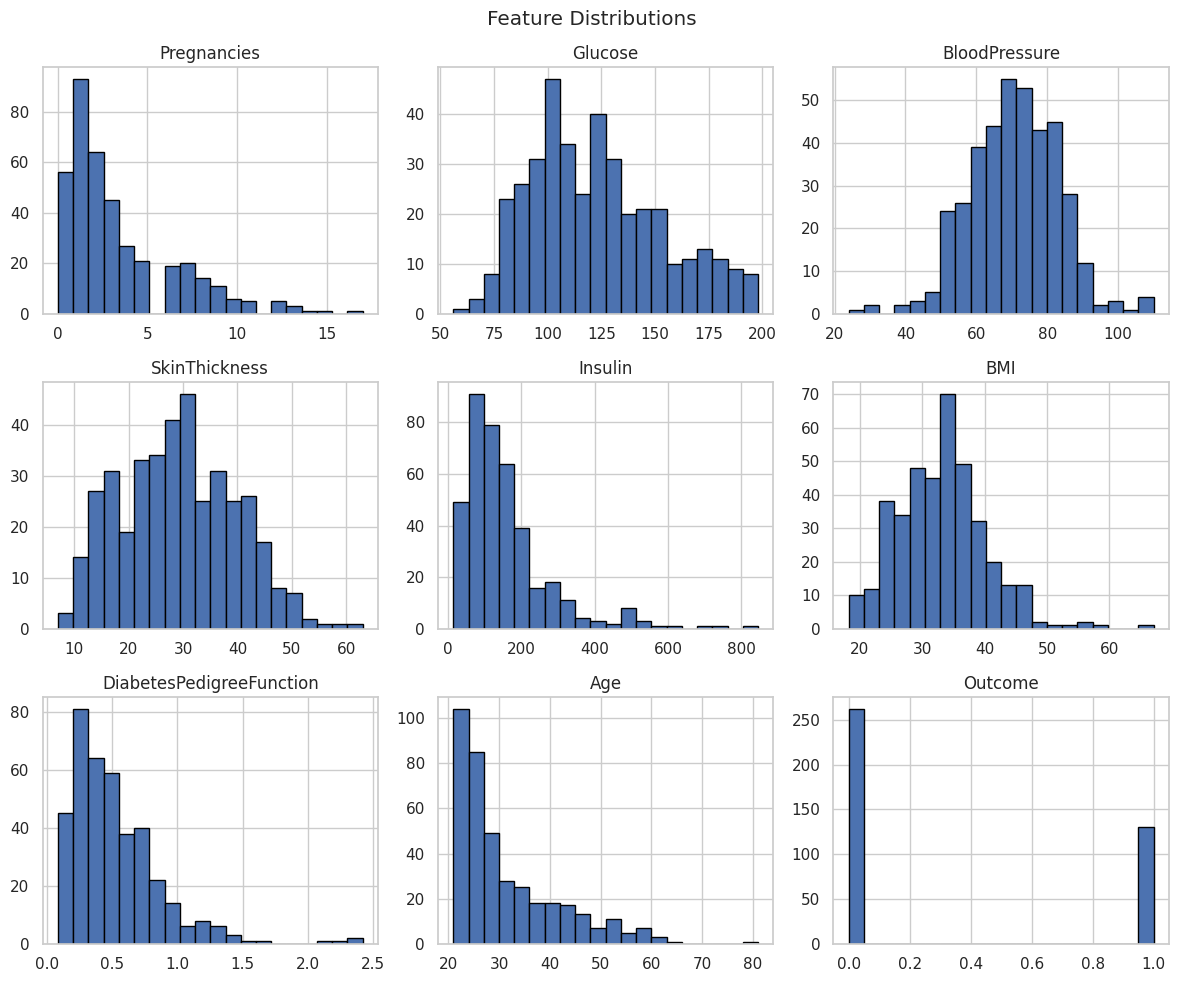

In [9]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

## Correlation Heatmap

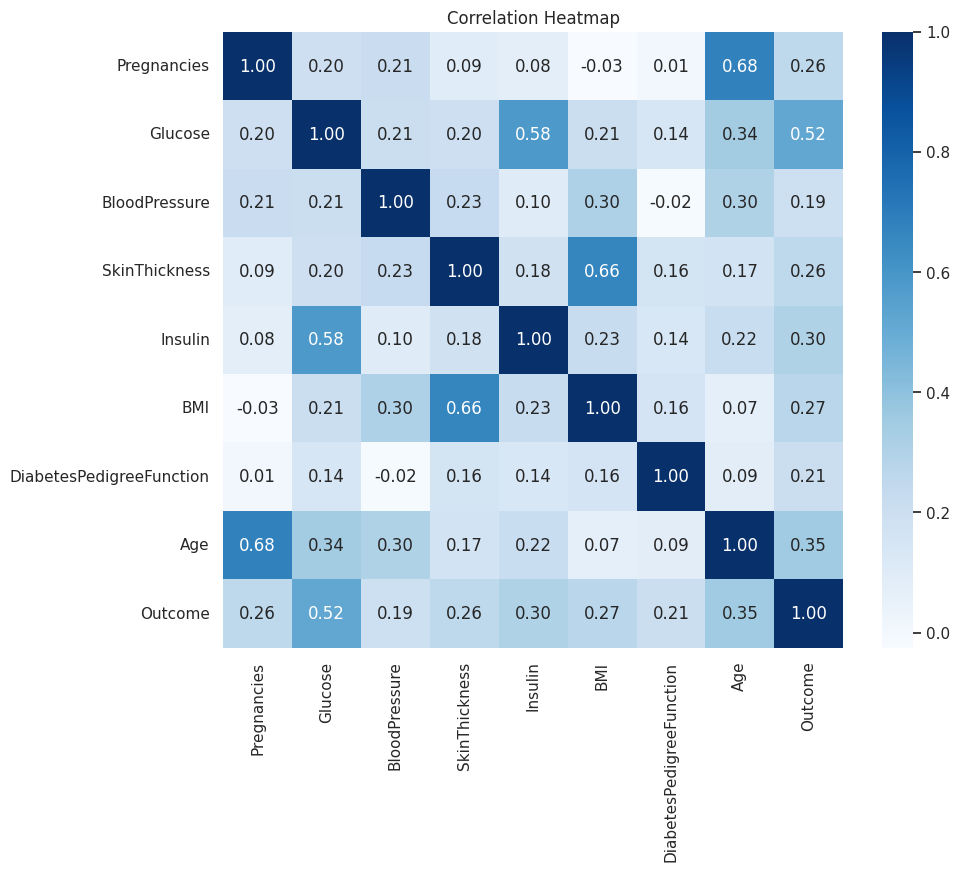

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Outcome comparison

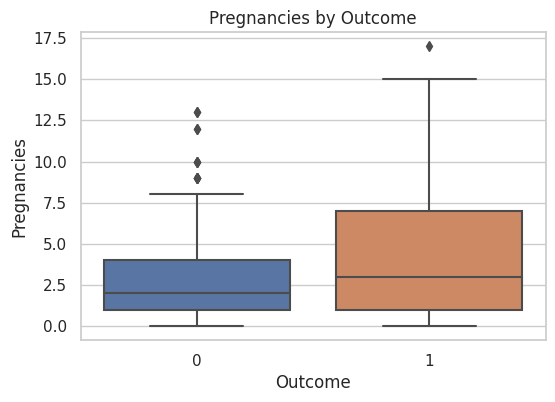

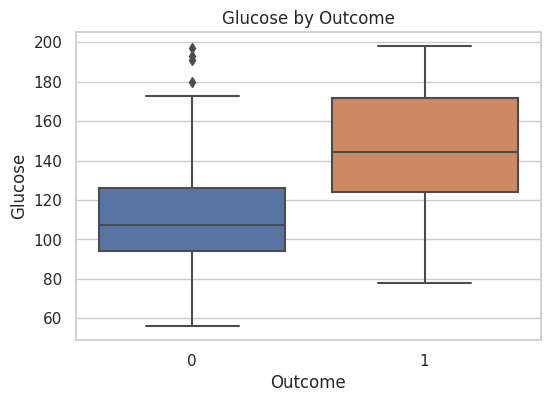

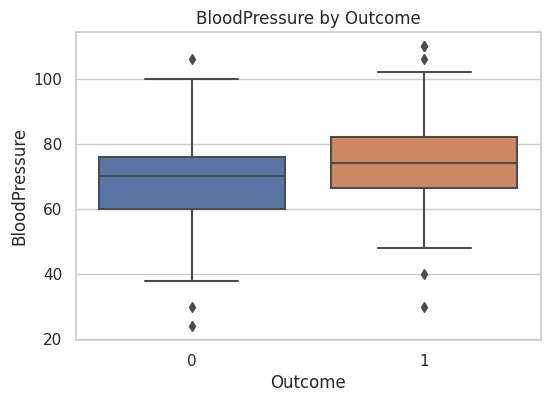

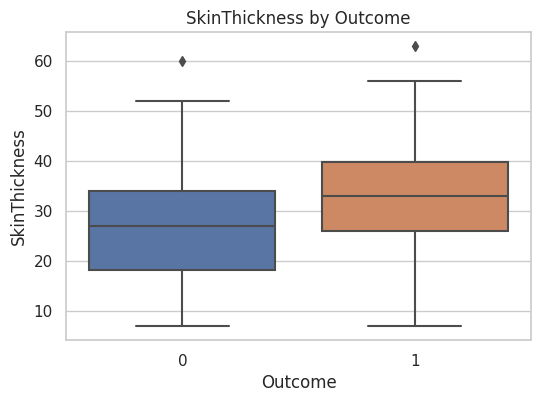

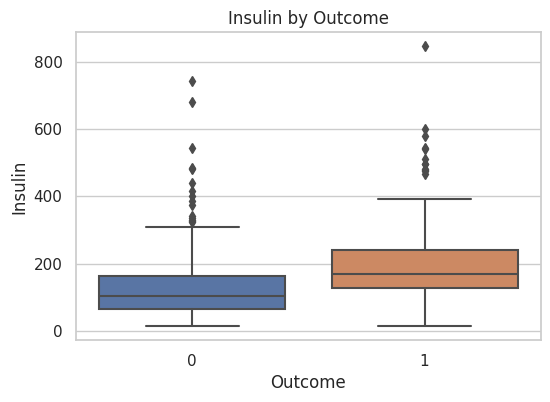

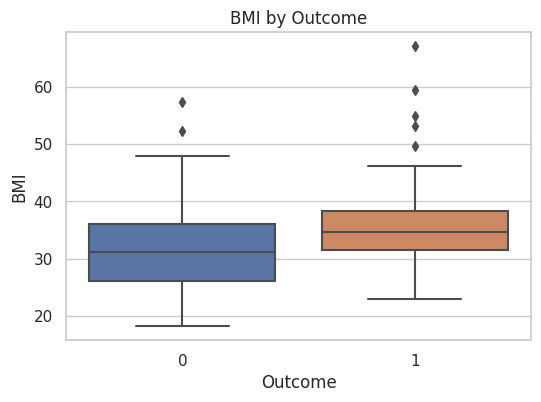

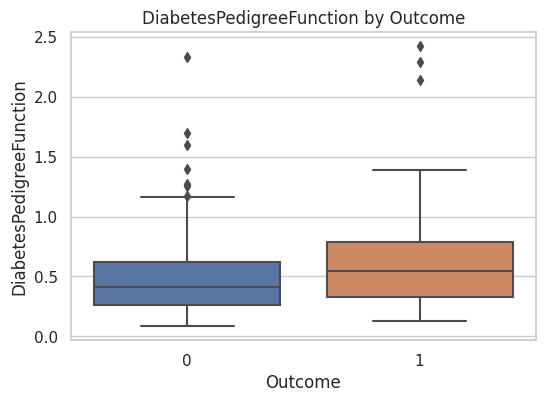

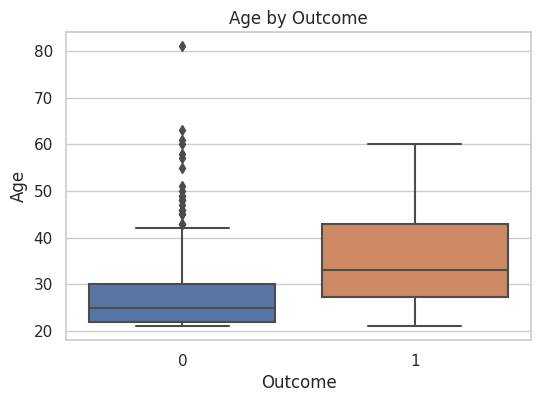

In [11]:
for col in df.columns[:-1]:  # Skip 'Outcome'
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} by Outcome')
    plt.show()

# Modeling (Classification)

## Train/Test Split

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Standardize Features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit and Evaluate Models

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.78      0.69      0.73        26

    accuracy                           0.84        79
   macro avg       0.82      0.80      0.81        79
weighted avg       0.83      0.84      0.83        79

ROC AUC: 0.8875181422351234


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.76      0.73      0.75        26

    accuracy                           0.84        79
   macro avg       0.82      0.81      0.81        79
weighted avg       0.83      0.84      0.83        79

ROC AUC: 0.8588534107402033


### XGBoost

In [16]:
# pip install xgboost if needed
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))

XGBoost
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        53
           1       0.71      0.77      0.74        26

    accuracy                           0.82        79
   macro avg       0.80      0.81      0.80        79
weighted avg       0.83      0.82      0.82        79



##  Feature Importance

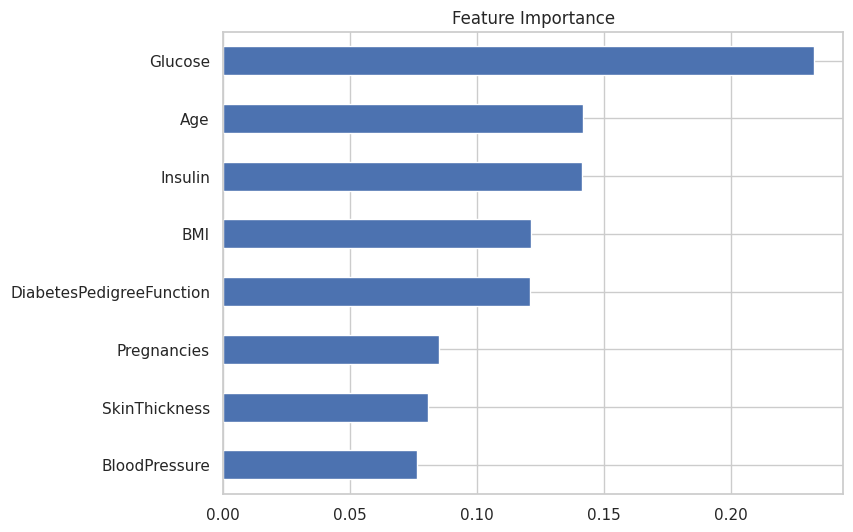

In [17]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6), title="Feature Importance")
plt.show()

## Conclusion

In this project, we explored the Diabetes Dataset to develop machine learning models capable of predicting diabetes based on various medical features. Through thorough exploratory data analysis, we identified key characteristics and relationships within the data that influence diabetes risk.

We built and evaluated multiple classification models, including Logistic Regression and Random Forest. The Random Forest model demonstrated strong predictive performance, achieving a good balance between precision and recall. Feature importance analysis highlighted glucose levels, BMI, and age as the most influential factors in diabetes prediction.

This project illustrates how machine learning can support early detection of diabetes, potentially aiding healthcare professionals in clinical decision-making. Further improvements could include hyperparameter tuning, incorporating additional data sources, and deploying an interactive prediction tool.

---

Thank you for reviewing this analysis — feedback and collaboration are welcome!
